In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import geopandas as gpd
import fiona

In [2]:
# venus crs for reference
venus_crs = 'GEOGCS["GCS_Venus_2000",DATUM["D_Venus_2000",SPHEROID["Venus_2000_IAU_IAG",6051800,0,AUTHORITY["ESRI","107902"]],AUTHORITY["ESRI","106902"]],PRIMEM["Reference_Meridian",0,AUTHORITY["ESRI","108900"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["ESRI","104902"]]'

### <b> EMISSIVITY VS ELEVATION PLOTS FOR DIFFFERENT OVDA UNITS </b>

['1-a', '1-b', '1-c', '2-a', '2-b', '3-a', '3-b', '3-c', '3-d', '4-a', '4-b', '4-c', 'Ridge belts - north', 'Festoon flow']
3-a


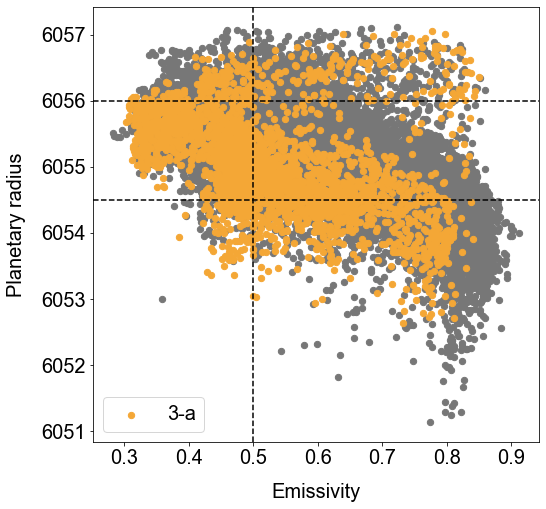

In [3]:
colors1 = ["#ee8026", "#f4a736", "#f7cb45", "#f7f056"]
colors2 = ["#4eb265",  "#7bafde", "#90c897", "#cae0ab","#6195cf", "#437dbf", "#1965b0"]
colors3 = ["#882e72", "#994f88", "#aa6f9e"] #, "#ba8db4", "#caaccb"]
bgcolor = "#777777"


file = ("/mnt/c/Users/iganesh/Work/Research/Venus/ImpactDeposits/Datasets/Ovda/Final/gpkg_units/arcdr_rdf_ovda_cycle1_May20_topoemis_hilosig2_n50_overlap05deg_n1deg_units_brushed_separate.gpkg")
brushedfile = ("/mnt/c/Users/iganesh/Work/Research/Venus/ImpactDeposits/Datasets/Ovda/Final/gpkg_units/Brushed_units.gpkg")
allunits = fiona.listlayers(file)


cat1 = ['Festoon flow',  '3-a', '2-a', '1-a']
cat2 = ['1-c', '2-b','3-d', '1-b', '3-b', '3-c', '4-a'] #, "Brushed unit"]
cat3 = ['4-b', '4-c', 'Ridge belts - north']


matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8)

emissivity_field = "SURFACE_EMISSIVITY"
topo_field = "AVERAGE_PLANETARY_RADIUS"
m = 1
unit = cat1[m]


for layername in allunits:
    data = gpd.read_file(file, layer=layername)
    if layername != unit:
        ax.scatter(data[emissivity_field], data[topo_field], marker = 'o', color=bgcolor, s=40) #, alpha = 0.5)
        
    
### plotting unit of interest in color
data = gpd.read_file(file, layer=unit)
ax.scatter(data[emissivity_field], data[topo_field], marker = 'o', color=colors1[m], s=40, label = unit)


### plotting the brushed unit
# brushed = gpd.read_file(brushedfile, layer=unit)
# ax.scatter(brushed[emissivity_field], brushed[topo_field], marker = 'x', color='k', s=40)


ax.axhline(6054.5, color = 'k', linestyle ="--")
ax.axhline(6056, color = 'k', linestyle ="--")
ax.axvline(0.5, color = 'k', linestyle ="--")
ax.set_ylabel("Planetary radius", fontsize = 20)
ax.set_xlabel("Emissivity", fontsize = 20)
ax.tick_params(axis="both", which="major", labelsize=20)
ax.legend(fontsize = 20, loc = "lower left")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
    
# plt.savefig("3a.png", bbox_inches='tight')
plt.show()